In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math
import os



Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir('/content/drive/My Drive/Aayush')

In [4]:
(x_train,_), (_,_) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


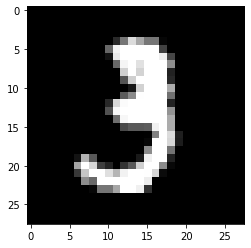

In [5]:
plt.imshow(x_train[10],cmap='gray')
plt.show()

In [6]:
#Normalize this data in the range [-1,1]
x_train = (x_train.astype('float32') - 127.5)/127.5
print(np.min(x_train))
print(np.max(x_train))

x_train = x_train.reshape((*x_train.shape,1))
x_train.shape

-1.0
1.0


(60000, 28, 28, 1)

In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(x_train.shape[0]/BATCH_SIZE)
HALF_BATCH = 128
NOISE_DIM = 100   #Upsample this into 784 Dim Vector
adam = keras.optimizers.Adam(learning_rate=2e-4,beta_1=0.5)

In [0]:
'''
#Generator using UpSampling2D layer

#Define the Generator
#Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128, input_shape = (NOISE_DIM,)))    #Upsampled the noise vector
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Now we Double the activation size 14 X 14 X 64
generator.add(UpSampling2D())   #Doubles the spatial dimenions by default
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer = adam)
generator.summary()


#Define the Discriminator Model  -- Downsampling -- Spatial size is decreasing and the number of channels in increasing
discriminator = Sequential()
discriminator.add(Conv2D(64,kernel_size=(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))


#Next Conv Layer  (14,14,64) ---> (7,7,128)
discriminator.add(Conv2D(128,kernel_size=(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

#Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()


'''


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)       

In [8]:
#Learnable Upsampling by using Transpsose Convolution

#Define the Generator
#Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128, input_shape = (NOISE_DIM,)))    #Upsampled the noise vector
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Now we Double the activation size 14 X 14 X 64 using transpose convolution
generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides=(2,2),padding='same'))       #This stride helps in upsampling the image.
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double Activation size 28 X 28 X 1
generator.add(Conv2DTranspose(1,kernel_size=(5,5),strides=(2,2),padding='same',activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer = adam)
generator.summary()


#Define the Discriminator Model  -- Downsampling -- Spatial size is decreasing and the number of channels in increasing
discriminator = Sequential()
discriminator.add(Conv2D(64,kernel_size=(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))


#Next Conv Layer  (14,14,64) ---> (7,7,128)
discriminator.add(Conv2D(128,kernel_size=(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

#Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)       

In [9]:
#GAN Step-2

discriminator.trainable= False
gan_input=Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [0]:
def save_imgs(epoch,samples=100) :
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')

  plt.tight_layout()
  plt.savefig('images_learnable_upsampling/dc_gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()


In [10]:
!mkdir images_learnable_upsampling
!mkdir model_learnable_upsampling
!ls

gan_output_epoch_10.png  gan_output_epoch_35.png  images
gan_output_epoch_15.png  gan_output_epoch_40.png  images_learnable_upsampling
gan_output_epoch_20.png  gan_output_epoch_45.png  model
gan_output_epoch_25.png  gan_output_epoch_50.png  model_learnable_upsampling
gan_output_epoch_30.png  gan_output_epoch_5.png


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc loss 0.4014 Generator loss 1.0149
Epoch 2 Disc loss 0.6883 Generator loss 1.0704
Epoch 3 Disc loss 0.6531 Generator loss 1.0041
Epoch 4 Disc loss 0.6507 Generator loss 1.0104
Epoch 5 Disc loss 0.6827 Generator loss 0.9410


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


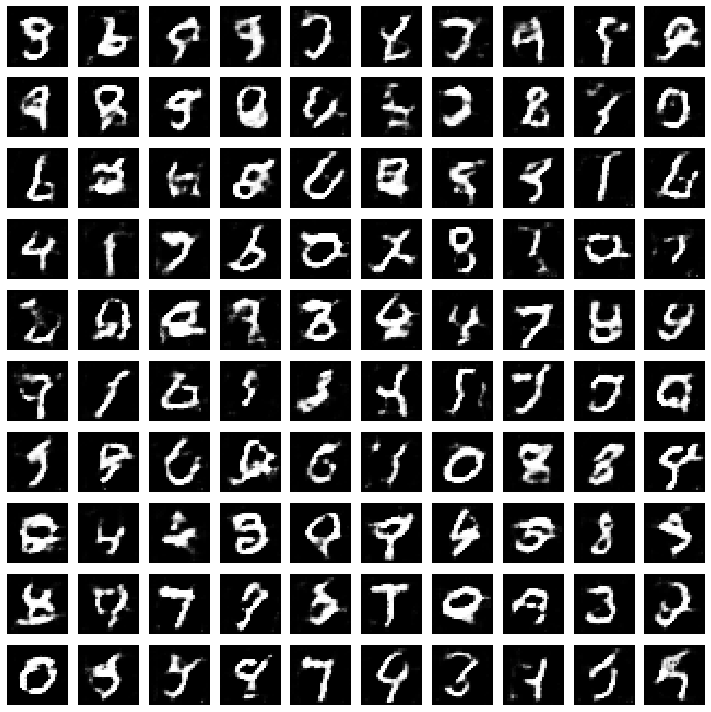

Epoch 6 Disc loss 0.6851 Generator loss 0.9127
Epoch 7 Disc loss 0.6850 Generator loss 0.8979
Epoch 8 Disc loss 0.6840 Generator loss 0.8961
Epoch 9 Disc loss 0.6822 Generator loss 0.8944
Epoch 10 Disc loss 0.6792 Generator loss 0.9090


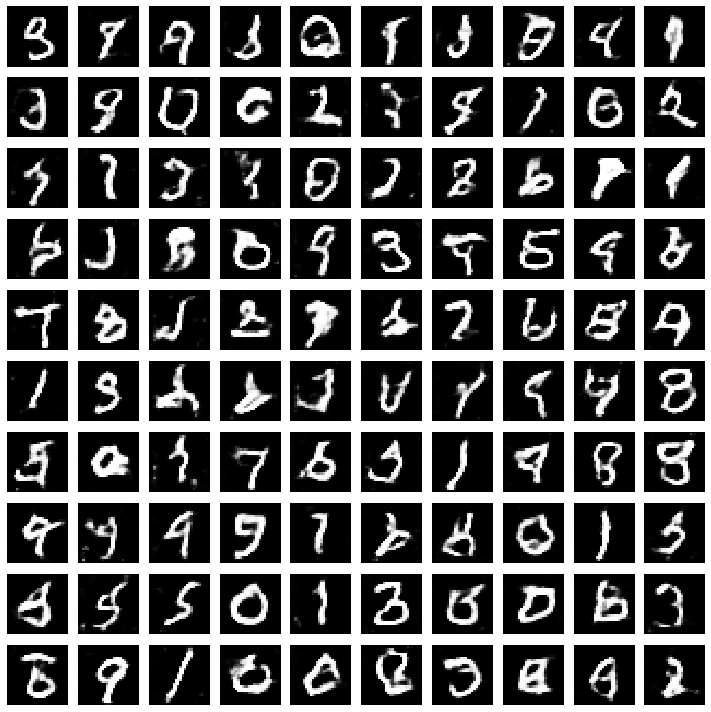

Epoch 11 Disc loss 0.6788 Generator loss 0.9035
Epoch 12 Disc loss 0.6776 Generator loss 0.8982
Epoch 13 Disc loss 0.6765 Generator loss 0.8919
Epoch 14 Disc loss 0.6743 Generator loss 0.9135
Epoch 15 Disc loss 0.6761 Generator loss 0.8937


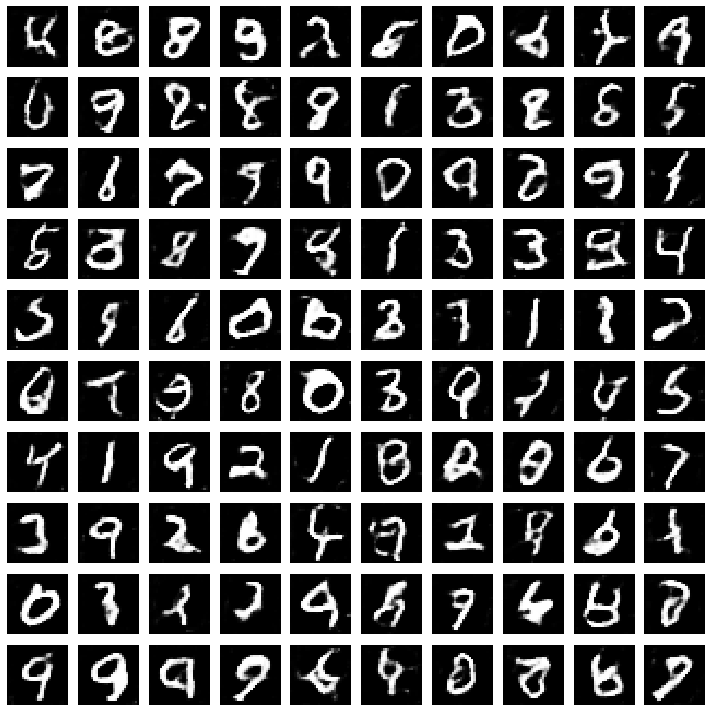

Epoch 16 Disc loss 0.6741 Generator loss 0.9089
Epoch 17 Disc loss 0.6740 Generator loss 0.9017
Epoch 18 Disc loss 0.6735 Generator loss 0.9102
Epoch 19 Disc loss 0.6731 Generator loss 0.9106
Epoch 20 Disc loss 0.6724 Generator loss 0.9119


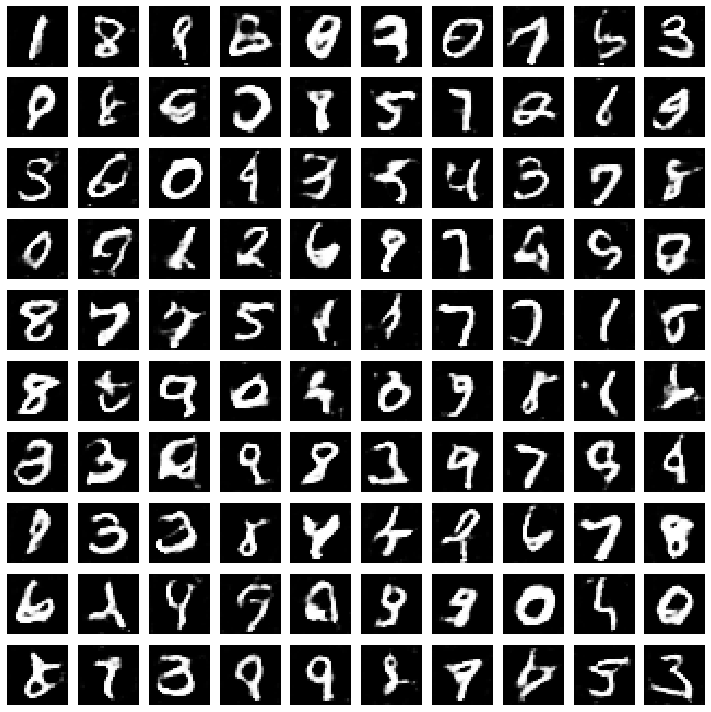

Epoch 21 Disc loss 0.6720 Generator loss 0.9130
Epoch 22 Disc loss 0.6711 Generator loss 0.9103
Epoch 23 Disc loss 0.6705 Generator loss 0.9187
Epoch 24 Disc loss 0.6703 Generator loss 0.9183
Epoch 25 Disc loss 0.6701 Generator loss 0.9193


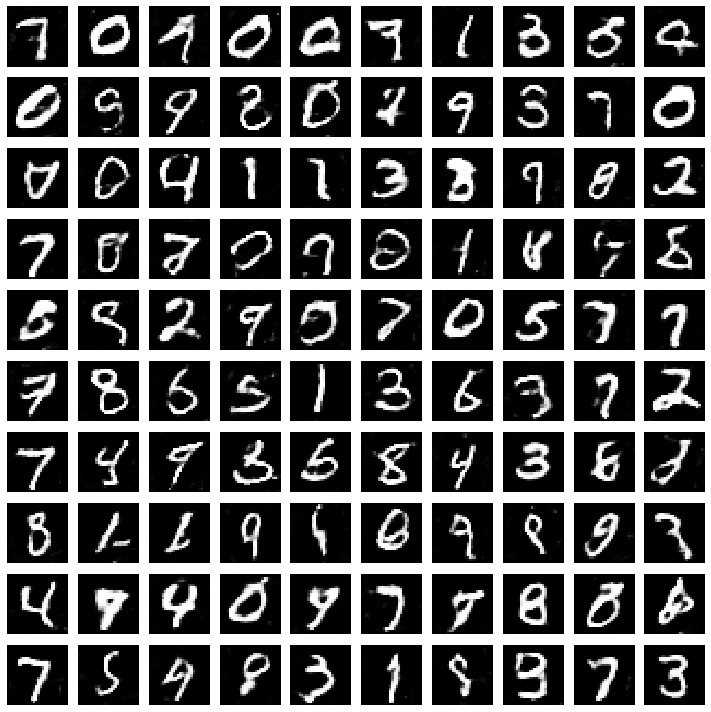

Epoch 26 Disc loss 0.6681 Generator loss 0.9277
Epoch 27 Disc loss 0.6678 Generator loss 0.9283
Epoch 28 Disc loss 0.6679 Generator loss 0.9315
Epoch 29 Disc loss 0.6669 Generator loss 0.9353
Epoch 30 Disc loss 0.6656 Generator loss 0.9344


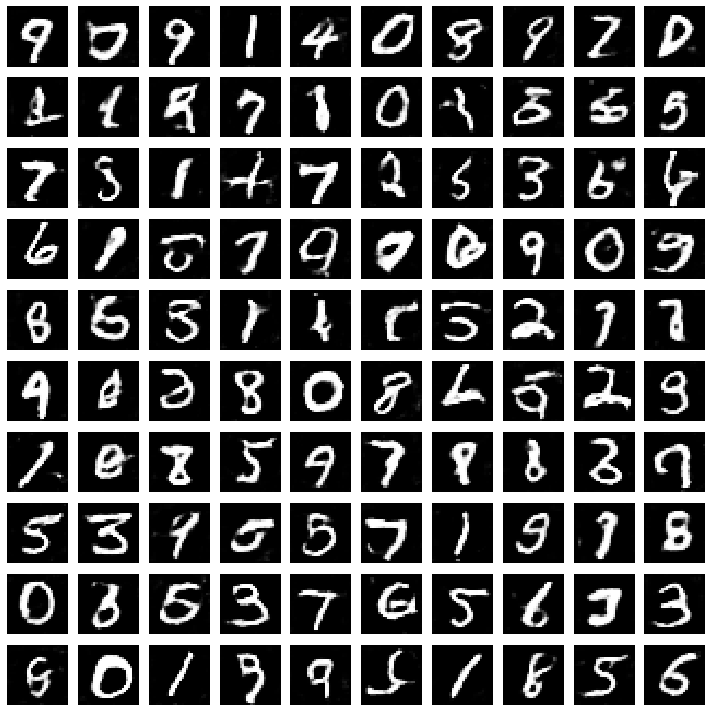

Epoch 31 Disc loss 0.6649 Generator loss 0.9401
Epoch 32 Disc loss 0.6641 Generator loss 0.9428
Epoch 33 Disc loss 0.6635 Generator loss 0.9482
Epoch 34 Disc loss 0.6633 Generator loss 0.9504
Epoch 35 Disc loss 0.6618 Generator loss 0.9540


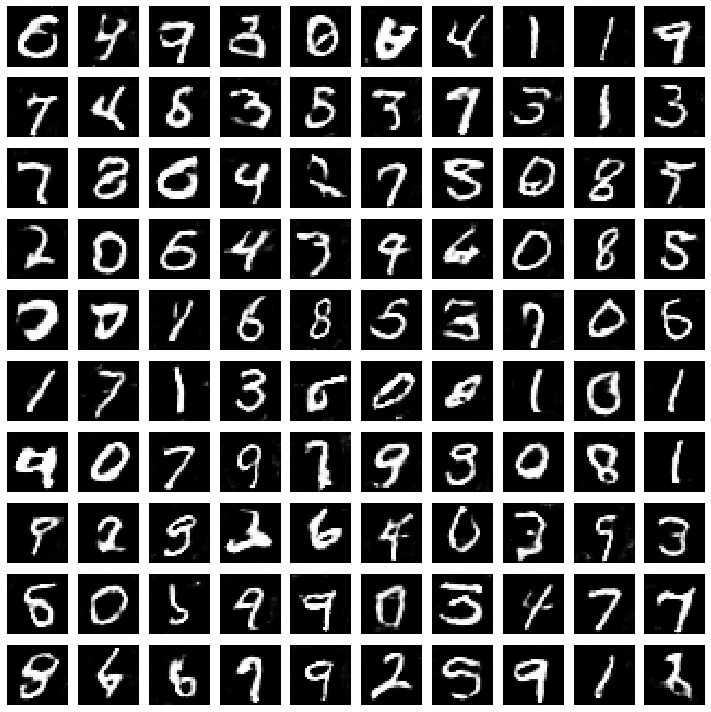

Epoch 36 Disc loss 0.6605 Generator loss 0.9602
Epoch 37 Disc loss 0.6602 Generator loss 0.9621
Epoch 38 Disc loss 0.6581 Generator loss 0.9664
Epoch 39 Disc loss 0.6585 Generator loss 0.9680
Epoch 40 Disc loss 0.6572 Generator loss 0.9753


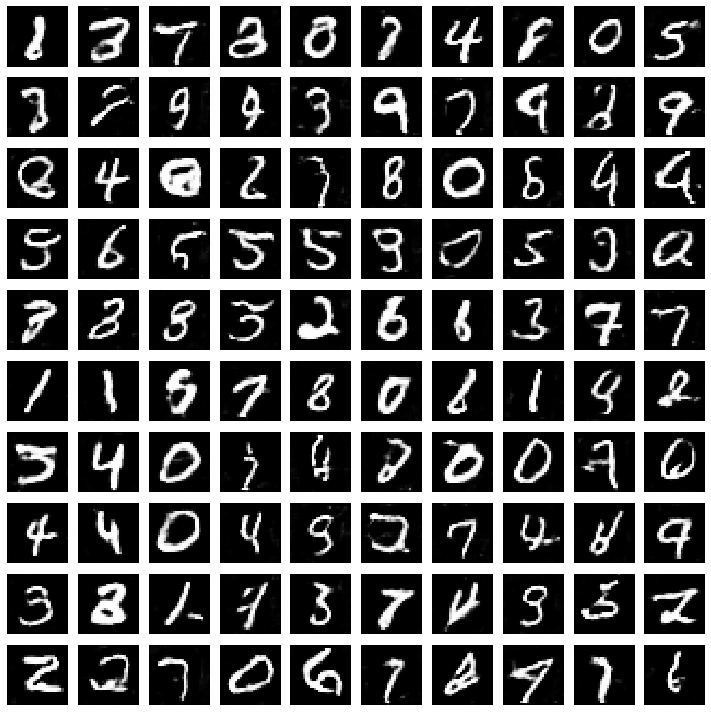

Epoch 41 Disc loss 0.6572 Generator loss 0.9793
Epoch 42 Disc loss 0.6559 Generator loss 0.9769
Epoch 43 Disc loss 0.6555 Generator loss 0.9861
Epoch 44 Disc loss 0.6540 Generator loss 0.9878
Epoch 45 Disc loss 0.6536 Generator loss 0.9899


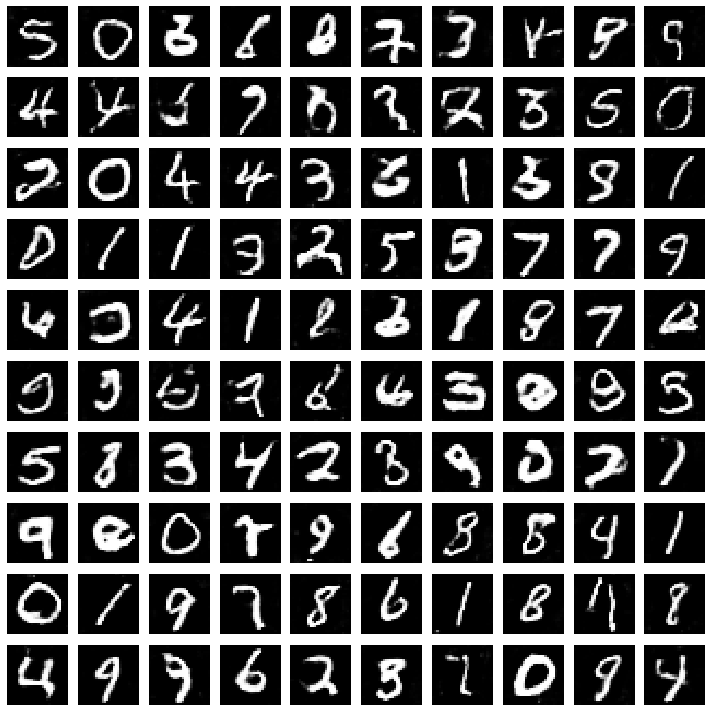

Epoch 46 Disc loss 0.6522 Generator loss 0.9986
Epoch 47 Disc loss 0.6518 Generator loss 0.9991
Epoch 48 Disc loss 0.6526 Generator loss 0.9998
Epoch 49 Disc loss 0.6511 Generator loss 1.0037
Epoch 50 Disc loss 0.6510 Generator loss 1.0067


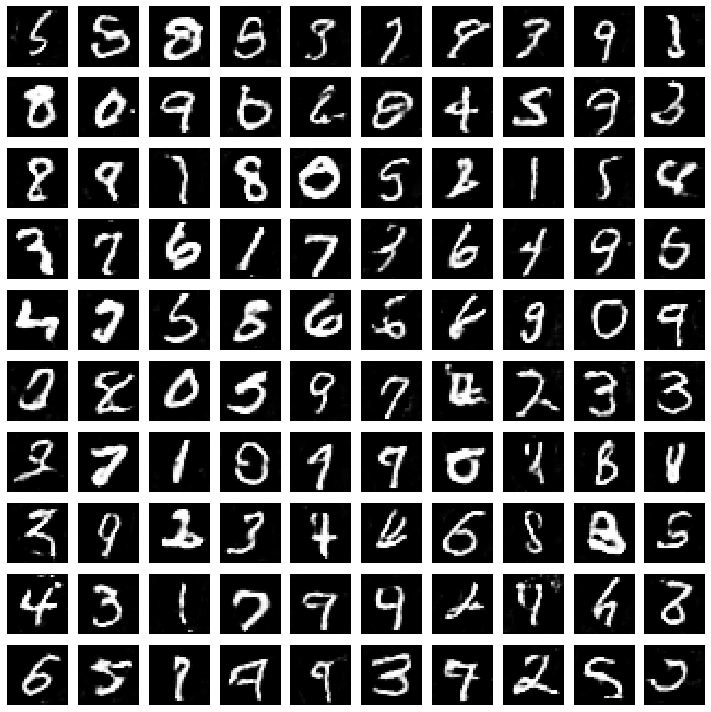

In [12]:
#Training Loop - Cannot use the fit function directly

d_losses = []
g_losses = []
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss=0.
  epoch_g_loss=0.
  
  #Mini Batch SGD - Stochastic Gradient Descent
  for step in range(NO_OF_BATCHES):

    #Step 1 : Discriminator
    # 50% real data + 50% fake data
    
    #Getting the Real data X 
    idx = np.random.randint(0,x_train.shape[0],HALF_BATCH)
    real_imgs = x_train[idx]

    #Getting the Fake data X
    noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise)    #Forward pass through the generator to give us some fake images, while keeping the generator frozen.

    #Labels for real and fake images
    real_y = np.ones((HALF_BATCH,1))*0.9
    fake_y = np.zeros((HALF_BATCH,1))

    #Train our Discriminator 
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    #Train the Generator (Considering the discriminator frozen)
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))      #We are not using label smoothing
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss

  print("Epoch %d Disc loss %.4f Generator loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))

  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if (epoch+1)%5==0 :
    generator.save('model_learnable_upsampling/dc_gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)




